In [22]:
from sklearn import datasets
from matplotlib import pyplot
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
pd.options.display.max_rows = 10

Data = datasets.load_iris()
print(dir(Data))

File = pd.DataFrame(Data.data,columns=Data.feature_names)
File['Target'] = Data.target
File['Target Name'] = File.Target.apply(lambda x : Data.target_names[x])
File

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [15]:
File_0 = File[0:50]
File_1 = File[50:100]
File_2 = File[100:150]

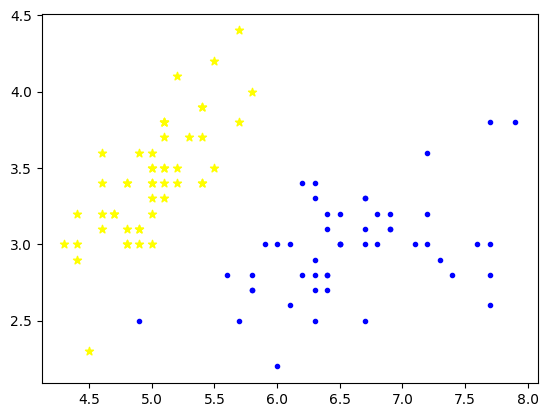

In [18]:
pyplot.scatter(File_0['sepal length (cm)'],File_0['sepal width (cm)'],marker='*',color='yellow')
#pyplot.scatter(File_1['sepal length (cm)'],File_1['sepal width (cm)'],marker='P',color='red')
pyplot.scatter(File_2['sepal length (cm)'],File_2['sepal width (cm)'],marker='.',color='blue')

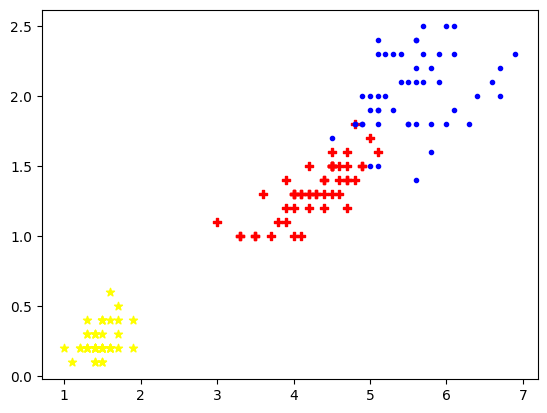

In [23]:
pyplot.scatter(File_0['petal length (cm)'],File_0['petal width (cm)'],marker='*',color='yellow')
pyplot.scatter(File_1['petal length (cm)'],File_1['petal width (cm)'],marker='P',color='red')
pyplot.scatter(File_2['petal length (cm)'],File_2['petal width (cm)'],marker='.',color='blue')

In [28]:
X = File.drop(['Target','Target Name'],axis='columns')
Y = File['Target']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=1)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
KNN.predict([[3.4,3.6,4.5,3.2]])

C:\Users\Shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [47]:
print('\nThe Accurecy of Train Data is :{0}'.format(KNN.score(X_train,y_train)))
print('\nThe Accurecy of Test Data is :{0}'.format(KNN.score(X_test,y_test)))


The Accurecy of Train Data is :0.9583333333333334

The Accurecy of Test Data is :1.0


In [50]:
from sklearn.metrics import confusion_matrix

predict = KNN.predict(X_test)
CM = confusion_matrix(y_test,predict)
CM

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(45.722222222222214, 0.5, 'Predicted')

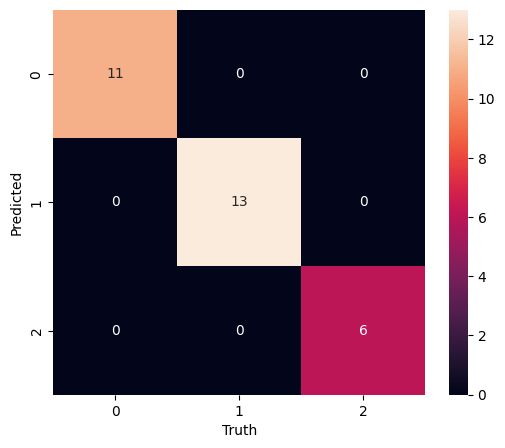

In [51]:
import seaborn
pyplot.figure(figsize=(6,5))
seaborn.heatmap(CM,annot=True)
pyplot.xlabel('Truth')
pyplot.ylabel('Predicted')